<a href="https://colab.research.google.com/github/kimujinu/Machine-learning/blob/main/%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor%2CKNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris,load_breast_cancer,load_boston,fetch_california_housing
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [5]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
print("학습 데이터 점수: {}",format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test,y_test)))

학습 데이터 점수: {} 0.975
평가 데이터 점수: {} 0.9666666666666667


In [10]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [11]:
print("학습 데이터 점수: {}",format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test,y_test)))

학습 데이터 점수: {} 0.31666666666666665
평가 데이터 점수: {} 0.4


In [12]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00136828, 0.00090837, 0.0011971 , 0.0010457 , 0.00103045]),
 'score_time': array([0.00341725, 0.00204611, 0.00316715, 0.00318241, 0.00296044]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [13]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights':['uniform','distance'],
               'algorithm':['ball_tree','kd_tree','brute']}]

In [14]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [15]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [16]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [17]:
print("GridSearchCV best score:{}",format(gs.best_score_))

GridSearchCV best score:{} 0.9800000000000001


In [18]:
def make_meshgrid(x,y,h=.02):
  x_min,x_max = x.min()-1,x.max()+1
  y_min,y_max = y.min()-1,y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
  return xx,yy

In [19]:
def plot_contours(clf,xx,yy,**params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy,Z,**params)

  return out

In [20]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [21]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-18.041906,19.859640,0
1,-18.751715,17.067120,0
2,-17.568462,17.427740,0
3,-17.884033,16.909117,0
4,-17.624552,19.926538,0
...,...,...,...
145,12.871348,-4.005307,2
146,10.499215,-6.278549,2
147,12.212147,-4.749583,2
148,11.331045,-2.792943,2


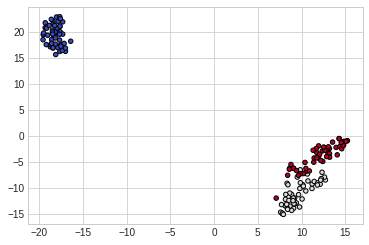

In [22]:
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20,edgecolor='k')

In [23]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

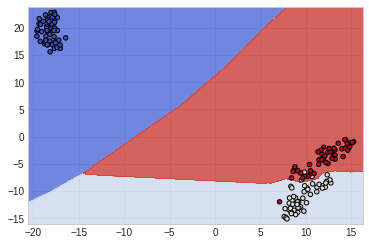

In [25]:
xx,yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20,edgecolors='k')

### 유방암 데이터

In [26]:
cancer = load_breast_cancer()

In [28]:
cancer_df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
X,y = cancer.data, cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
cancer_train_df = pd.DataFrame(data=X_train,columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,0.1186,1.1820,1.174,6.802,0.005515,0.026740,0.03735,0.005128,0.01951,0.004583,9.965,27.99,66.61,301.0,0.1086,0.1887,0.18680,0.02564,0.2376,0.09206,1
1,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.065970,0.1308,0.05866,0.5296,1.6670,3.767,58.530,0.031130,0.085550,0.14380,0.039270,0.02175,0.012560,18.070,28.07,120.40,1021.0,0.1243,0.1793,0.28030,0.10990,0.1603,0.06818,0
2,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.320,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
3,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.1256,0.0834,0.00000,0.00000,0.3058,0.09938,1
4,11.670,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.021570,0.1859,0.06461,0.2067,0.8745,1.393,15.340,0.005251,0.017270,0.01840,0.005298,0.01449,0.002671,13.350,28.81,87.00,550.6,0.1550,0.2964,0.27580,0.08120,0.3206,0.08950,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.022780,0.1920,0.05907,0.3249,0.9591,2.183,23.470,0.008328,0.008722,0.01349,0.008670,0.03218,0.002386,12.840,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036,1
451,11.610,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.044970,0.1886,0.06320,0.2456,0.7339,1.667,15.890,0.005884,0.020050,0.02631,0.013040,0.01848,0.001982,12.640,19.67,81.93,475.7,0.1415,0.2170,0.23020,0.11050,0.2787,0.07427,1
452,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.119800,0.2113,0.07115,0.4030,0.7747,3.123,41.510,0.007159,0.037180,0.06165,0.010510,0.01591,0.005099,20.800,27.78,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980,0
453,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.124200,0.2375,0.07603,0.5204,1.3240,3.477,51.220,0.009329,0.065590,0.09953,0.022830,0.05543,0.007330,17.360,24.17,119.40,915.3,0.1550,0.5046,0.68720,0.21350,0.4245,0.10500,0


In [31]:
cancer_train_df = pd.DataFrame(data=X_test,columns=cancer.feature_names)
cancer_train_df['target'] = y_test
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.050,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,0.2035,0.06501,0.3106,1.5100,2.590,21.57,0.007807,0.03932,0.05112,0.018760,0.02860,0.005715,14.19,24.85,94.22,591.2,0.1343,0.2658,0.25730,0.12580,0.3113,0.08317,1
1,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,0.7474,1.0160,5.029,79.25,0.010820,0.02203,0.03500,0.018090,0.01550,0.001948,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.28290,0.15200,0.2650,0.06387,0
2,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,0.3473,0.9209,2.244,32.19,0.004766,0.02374,0.02384,0.008637,0.01772,0.003131,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.39760,0.14790,0.3993,0.10640,0
3,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,0.1936,0.06128,0.1601,1.4300,1.109,11.28,0.006064,0.00911,0.01042,0.007638,0.02349,0.001661,12.61,26.55,80.92,483.1,0.1223,0.1087,0.07915,0.05741,0.3487,0.06958,1
4,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,0.2498,1.2160,1.976,15.24,0.008732,0.02042,0.01062,0.006801,0.01824,0.003494,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.591,25.20,0.008081,0.05122,0.05551,0.018830,0.02545,0.004312,16.08,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0
110,12.320,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.01180,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,1
111,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,0.3704,0.8249,2.427,31.33,0.005072,0.02147,0.02185,0.009560,0.01719,0.003317,17.38,28.00,113.10,907.2,0.1530,0.3724,0.36640,0.14920,0.3739,0.10270,0
112,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.03872,0.015670,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.67800,0.29030,0.4098,0.12840,0


In [65]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [66]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
print("학습 데이터 점수: {}",format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test,y_test)))

학습 데이터 점수: {} 0.9472527472527472
평가 데이터 점수: {} 0.9122807017543859


In [68]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [69]:
print("학습 데이터 점수: {}",format(model.score(X_train_scale,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test_scale,y_test)))

학습 데이터 점수: {} 0.9802197802197802
평가 데이터 점수: {} 0.9736842105263158


In [70]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [71]:
cross_validate(
    estimator = estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00290322, 0.00301242, 0.00243306, 0.00232244, 0.00233531]),
 'score_time': array([0.01178575, 0.01084924, 0.00843096, 0.00837517, 0.00682902]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [72]:
pipe = Pipeline(
    [('scaler',StandardScaler()),
     ('model',KNeighborsClassifier())]
)

In [73]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree','kd_tree','brute']}]

In [74]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [53]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [54]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [56]:
print('GridSearchCV best score : {}',format(gs.best_score_))

GridSearchCV best score : {} 0.9701288619779538


In [57]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [60]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target']=y
cancer_comp_df

,0,1,target
0,29.163750,-4.537574,0
1,30.494541,-6.912069,0
2,26.616697,-9.823038,0
3,-15.715522,18.543911,0
4,24.396839,-9.093020,0
...,...,...,...
564,32.160942,-6.690528,0
565,26.999336,-8.747997,0
566,10.358079,-16.878254,0
567,28.438158,-7.697092,0


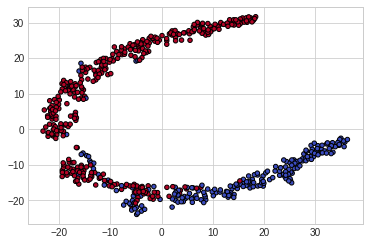

In [61]:
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20,edgecolor='k')

In [62]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

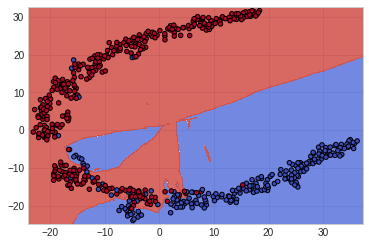

In [63]:
xx,yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20,edgecolor='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [75]:
boston = load_boston()
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [76]:
X,y = boston.data,boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [78]:
boston_train_df = pd.DataFrame(data=X_train,columns=boston.feature_names)
boston_train_df['Target']= y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0
1,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72,24.8
2,0.09266,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67,26.4
3,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
4,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24.0,666.0,20.2,386.73,18.85,15.4
400,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3
401,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1
402,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8


In [80]:
boston_test_df = pd.DataFrame(data=X_test,columns=boston.feature_names)
boston_test_df['Target']= y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.12744,0.0,6.91,0.0,0.4480,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6
1,4.64689,0.0,18.10,0.0,0.6140,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66,29.8
2,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
3,0.35809,0.0,6.20,1.0,0.5070,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7
4,10.06230,0.0,18.10,0.0,0.5840,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.10328,25.0,5.13,0.0,0.4530,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
98,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01,46.0
99,1.13081,0.0,8.14,0.0,0.5380,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,12.7
100,0.16760,0.0,7.38,0.0,0.4930,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20,23.8


In [81]:
sclaer = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [82]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [83]:
print("학습 데이터 점수: {}",format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test,y_test)))

학습 데이터 점수: {} 0.7061604080372974
평가 데이터 점수: {} 0.3389963949260876


In [84]:
model = KNeighborsRegressor()
model.fit(X_train_scale,y_train)

KNeighborsRegressor()

In [85]:
print("학습 데이터 점수: {}",format(model.score(X_train_scale,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test_scale,y_test)))

학습 데이터 점수: {} 0.8534399958405794
평가 데이터 점수: {} 0.5548400470720984


In [86]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [87]:
cross_validate(
    estimator = estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00314689, 0.00584102, 0.00266266, 0.00353146, 0.00231385]),
 'score_time': array([0.00345206, 0.00304151, 0.00266647, 0.00287247, 0.00247693]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [88]:
pipe = Pipeline(
    [('scaler',StandardScaler()),
     ('model',KNeighborsRegressor())]
)

In [89]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree','kd_tree','brute']}]

In [90]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [91]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [92]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [93]:
print('GridSearchCV best score : {}',format(gs.best_score_))

GridSearchCV best score : {} 0.4973060611762845


In [97]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [98]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target']=y
boston_comp_df

,0,target
0,8.954089,24.0
1,-15.990651,21.6
2,-11.784803,34.7
3,-12.740770,33.4
4,-12.992512,36.2
...,...,...
501,1.532620,22.4
502,0.885120,20.6
503,0.058777,23.9
504,0.110507,22.0


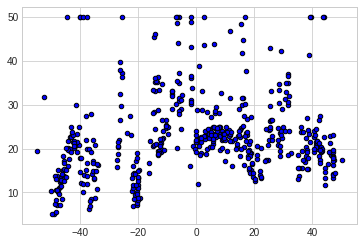

In [99]:
plt.scatter(X_comp,y,c='b',cmap=plt.cm.coolwarm,s=20,edgecolor='k')

In [100]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

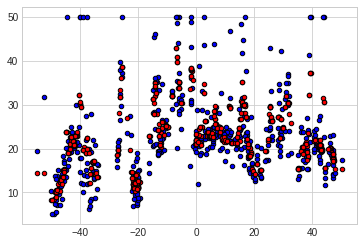

In [101]:
plt.scatter(X_comp,y,c='b',cmap=plt.cm.coolwarm,s=20,edgecolor='k')
plt.scatter(X_comp,predict,c='r',cmap=plt.cm.coolwarm,s=20,edgecolor='k')

### 캘리포니아 주택 가격 데이터

In [102]:
california = fetch_california_housing()

In [103]:
california_df = pd.DataFrame(data=california.data,columns=california.feature_names)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [104]:
X,y = california.data,california.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [105]:
california_train_df = pd.DataFrame(data=X_train,columns=california.feature_names)
california_train_df['Target']= y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,3.8864,36.0,5.438406,1.039855,703.0,2.547101,37.69,-122.15,1.97300
1,2.6392,21.0,6.221631,1.074468,1576.0,2.794326,38.76,-120.76,1.48500
2,4.8942,36.0,5.073955,1.003215,827.0,2.659164,33.86,-118.15,1.94100
3,9.1569,22.0,7.252669,0.925267,773.0,2.750890,37.28,-122.01,5.00001
4,4.3636,33.0,5.510204,1.014842,1869.0,3.467532,33.81,-118.00,2.01800
...,...,...,...,...,...,...,...,...,...
16507,5.5184,35.0,5.624625,1.054054,945.0,2.837838,37.56,-122.30,2.74800
16508,2.2140,27.0,4.655907,1.036798,4828.0,3.116850,38.51,-121.44,0.82400
16509,3.1080,44.0,4.202000,0.992000,1038.0,2.076000,33.78,-118.14,2.17900
16510,10.8783,52.0,8.503185,0.961783,402.0,2.560510,37.79,-122.44,5.00001


In [106]:
california_test_df = pd.DataFrame(data=X_test,columns=california.feature_names)
california_test_df['Target']= y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,6.4285,29.0,6.949569,1.004920,2098.0,2.580566,37.28,-121.91,3.373
1,4.3667,50.0,4.881783,1.040698,1117.0,2.164729,34.07,-118.37,4.056
2,3.3438,50.0,5.102787,1.024390,1931.0,3.364111,34.13,-118.20,1.736
3,3.5737,30.0,5.685185,1.048822,1289.0,2.170034,38.53,-121.52,1.712
4,5.0480,26.0,5.000000,1.000000,11.0,3.666667,37.60,-122.37,3.500
...,...,...,...,...,...,...,...,...,...
4123,1.7981,41.0,3.296588,1.026247,1511.0,3.965879,34.02,-118.16,1.660
4124,2.1976,52.0,4.590323,1.137097,1519.0,2.450000,38.11,-122.25,0.979
4125,5.4165,38.0,4.609504,1.010331,940.0,1.942149,34.12,-118.16,4.351
4126,4.4896,31.0,4.525424,1.011299,1179.0,3.330508,37.36,-121.86,1.568


In [107]:
sclaer = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [108]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [109]:
print("학습 데이터 점수: {}",format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test,y_test)))

학습 데이터 점수: {} 0.459275424821201
평가 데이터 점수: {} 0.12214609506324137


In [110]:
model = KNeighborsRegressor()
model.fit(X_train_scale,y_train)

KNeighborsRegressor()

In [111]:
print("학습 데이터 점수: {}",format(model.score(X_train_scale,y_train)))
print("평가 데이터 점수: {}",format(model.score(X_test_scale,y_test)))

학습 데이터 점수: {} 0.7958814045962479
평가 데이터 점수: {} 0.6717785318289643


In [112]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [113]:
cross_validate(
    estimator = estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.4s finished


{'fit_time': array([0.04556608, 0.04003644, 0.03487945, 0.0376699 , 0.03735256]),
 'score_time': array([0.57559848, 0.4731977 , 0.49764895, 0.57143474, 0.35682178]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [114]:
pipe = Pipeline(
    [('scaler',StandardScaler()),
     ('model',KNeighborsRegressor())]
)

In [115]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree','kd_tree','brute']}]

In [116]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [117]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [118]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [119]:
print('GridSearchCV best score : {}',format(gs.best_score_))

GridSearchCV best score : {} 0.5376515274379832


In [120]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [121]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target']=y
boston_comp_df

,0,target
0,-50.582115,4.526
1,-87.773003,3.585
2,68.251877,3.521
3,62.222420,3.413
4,61.440075,3.422
...,...,...
20635,31.766300,0.781
20636,-26.211761,0.771
20637,37.312729,0.923
20638,-5.614341,0.847


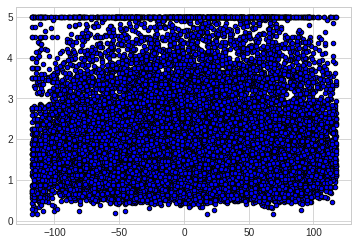

In [122]:
plt.scatter(X_comp,y,c='b',cmap=plt.cm.coolwarm,s=20,edgecolor='k')

In [123]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

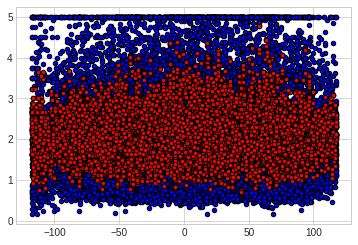

In [124]:
plt.scatter(X_comp,y,c='b',cmap=plt.cm.coolwarm,s=20,edgecolor='k')
plt.scatter(X_comp,predict,c='r',cmap=plt.cm.coolwarm,s=20,edgecolor='k')